<a href="https://colab.research.google.com/github/ImranRiazChohan/EyeGazeMovementDetection/blob/main/TrainingEyeGazeMovementClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.losses import categorical_crossentropy,sparse_categorical_crossentropy
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16 
from google.colab.patches import cv2_imshow

In [46]:
#Read Data From Directory
Orignal_dir="/content/drive/MyDrive/Internship_TechroticsLab/EyeGazeMovementDetector/EyeData"
Train_data_dir=os.path.join(Orignal_dir,"train")
train_center=os.path.join(Train_data_dir,"center")
train_left=os.path.join(Train_data_dir,"left")
train_right=os.path.join(Train_data_dir,"right")

In [47]:
left_data=os.listdir(train_left)
center_data=os.listdir(train_center)
right_data=os.listdir(train_right)

In [48]:
print(" Left Data",len(left_data),"\n","Right Data",
len(right_data),"\n","Center Data", 
len(center_data))

 Left Data 1224 
 Right Data 1173 
 Center Data 1225


In [55]:
train_left_img=[]
for i in range(len(left_data)):
  path=train_left+"/"+left_data[i]
  img=cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  cvt_img=cv2.resize(img,(75,75),1)
  train_left_img.append(cvt_img)

In [56]:
train_left_img[0].shape

(75, 75)

In [57]:
train_right_img=[]
for i in range(len(right_data)):
  path=train_right+"/"+right_data[i]
  img=cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  cvt_img=cv2.resize(img,(75,75),1)
  train_right_img.append(cvt_img)


In [58]:
train_center_img=[]
for i in range(len(center_data)):
  path=train_center+"/"+center_data[i]
  img=cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  cvt_img=cv2.resize(img,(75,75),1)
  train_center_img.append(cvt_img)

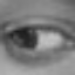

(75, 75)


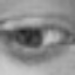

(75, 75)


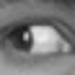

(75, 75)


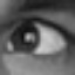

(75, 75)


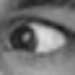

(75, 75)


In [59]:
for i in range(0,5):
  cv2_imshow(train_left_img[i])
  print(train_left_img[i].shape)

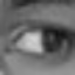

(75, 75)


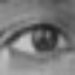

(75, 75)


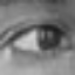

(75, 75)


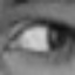

(75, 75)


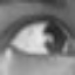

(75, 75)


In [60]:
for i in range(0,5):
  cv2_imshow(train_right_img[i])
  print(train_right_img[i].shape)

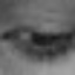

(75, 75)


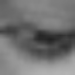

(75, 75)


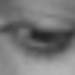

(75, 75)


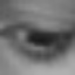

(75, 75)


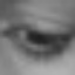

(75, 75)


In [61]:
for i in range (0,5):
  cv2_imshow(train_center_img[i])
  print(train_center_img[i].shape)

In [62]:
test_data_dir=os.path.join(Orignal_dir,"test")
test_center_data=os.path.join(test_data_dir,"center")
test_left_data=os.path.join(test_data_dir,"left")
test_right_data=os.path.join(test_data_dir,"right")

In [63]:
test_left=os.listdir(test_left_data)
test_right=os.listdir(test_right_data)
test_center=os.listdir(test_center_data)

In [64]:
print("left:{}\nright:{}\ncenter:{}".format(len(test_left),len(test_right),len(test_center)))

left:273
right:315
center:243


In [66]:
test_center_img=[]
test_right_img=[]
test_left_img=[]

for i in range(len(test_center)):
  path=test_center_data+"/"+test_center[i]
  img_center=cv2.imread(path)
  img_center=cv2.cvtColor(img_center,cv2.COLOR_BGR2GRAY)
  resize_img=cv2.resize(img_center,(75,75),1)
  test_center_img.append(resize_img)
for i in range(len(test_left)):
  path=test_left_data+"/"+test_left[i]
  img_left=cv2.imread(path)
  img_left=cv2.cvtColor(img_left,cv2.COLOR_BGR2GRAY)
  resize_img=cv2.resize(img_left,(75,75),1)
  test_left_img.append(resize_img)
for i in range(len(test_right)):
  path=test_right_data+"/"+test_right[i]
  img_right=cv2.imread(path)
  img_right=cv2.cvtColor(img_right,cv2.COLOR_BGR2GRAY)
  resize_img=cv2.resize(img_right,(75,75),1)
  test_right_img.append(resize_img)


In [68]:
train_data_gen=ImageDataGenerator(rotation_range=10,
                                  rescale=1./255,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  fill_mode="nearest")
test_data_gen=ImageDataGenerator(rescale=1./255)
valid_data_gen=ImageDataGenerator(rescale=1./255)

In [69]:
train_data_gen.flow_from_directory(Train_data_dir)
test_data_gen.flow_from_directory(test_data_dir)

Found 3622 images belonging to 3 classes.
Found 831 images belonging to 3 classes.


In [70]:
train_set=train_data_gen.flow_from_directory(Train_data_dir,target_size=(75,75),batch_size=16,color_mode="grayscale",class_mode="categorical")
test_set=test_data_gen.flow_from_directory(test_data_dir,target_size=(75,75),batch_size=16,color_mode="grayscale",class_mode="categorical")

Found 3622 images belonging to 3 classes.
Found 831 images belonging to 3 classes.


In [71]:
train_set.class_indices

{'center': 0, 'left': 1, 'right': 2}

In [93]:
model=Sequential()
model.add(Conv2D(32,(3,3),strides=1,padding="same",input_shape=(75,75,1),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),strides=1,padding="same",input_shape=(75,75,1),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),strides=1,padding="same",input_shape=(75,75,1),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),strides=1,padding="same",input_shape=(75,75,1),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),strides=1,padding="same",input_shape=(75,75,10),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3,activation="sigmoid"))


In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 75, 75, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_107 (Conv2D)         (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_108 (Conv2D)         (None, 18, 18, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 9, 9, 128)       

In [95]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["acc"])

In [96]:
callback=EarlyStopping(monitor='val_loss',patience=2)

In [97]:
history=model.fit(train_set,validation_data=test_set,epochs=10,callbacks=[callback])

Epoch 1/10
227/227 [==============================] - 10s 43ms/step - loss: 0.2346 - acc: 0.9045 - val_loss: 0.0655 - val_acc: 0.9771
Epoch 2/10
227/227 [==============================] - 10s 42ms/step - loss: 0.0407 - acc: 0.9892 - val_loss: 0.0029 - val_acc: 0.9988
Epoch 3/10
227/227 [==============================] - 9s 42ms/step - loss: 0.0331 - acc: 0.9881 - val_loss: 0.0124 - val_acc: 0.9976
Epoch 4/10
227/227 [==============================] - 9s 42ms/step - loss: 0.0295 - acc: 0.9909 - val_loss: 0.0023 - val_acc: 0.9988
Epoch 5/10
227/227 [==============================] - 10s 43ms/step - loss: 0.0208 - acc: 0.9950 - val_loss: 0.0039 - val_acc: 0.9988
Epoch 6/10
227/227 [==============================] - 10s 43ms/step - loss: 0.0183 - acc: 0.9950 - val_loss: 0.0041 - val_acc: 0.9976
